/home/gpu-machine/dataset/new_900_dataset/frame575.jpg
(1920, 1080)


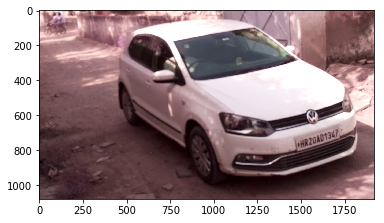

IOError: [Errno 2] No such file or directory: '/home/gpu-machine/rnpd/darknet_py/result_coordinate.txt'

In [4]:
# import the necessary packages
import os
import cv2
import argparse
import pytesseract
from PIL import Image
import glob,sys
import matplotlib.pyplot as plt
import numpy as np
import subprocess
#path='/home/gpu-machine/combined_data/4frame48.jpg'

def get_rnpd(impath):

    p = subprocess.Popen(["./darknet", "detector", "test", "cfg/obj.data", "cfg/yolo2-obj.cfg", "yolo2-obj.weights -dont_show", impath], stdout=subprocess.PIPE)
    p.communicate()
    input_image = Image.open(impath)
    print(input_image.size)
    plt.imshow(input_image)
    plt.show()

    #input_image = input_image.resize((1024, 720), Image.ANTIALIAS)
    coordinates = []

    with open('/home/gpu-machine/rnpd/darknet_py/result_coordinate.txt') as file:
        for items in file:
            item = items.rstrip('\n')
            coordinates.append(int(item))


    #print(coordinates)
    #print(" Coordinates Extracted ")
    cropped_image = input_image.crop((coordinates[0], coordinates[2], coordinates[1], coordinates[3]))
    save_path="/home/gpu-machine/dataset/new_900_dataset_crop/"+os.path.split(impath)[-1]
    cropped_image.save(save_path)
    image = cv2.imread(save_path)
    plt.imshow(image)
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Histogram equal for enhancing the number plate for further processing
#     y,cr,cb = cv2.split(cv2.cvtColor(image,cv2.COLOR_RGB2YCrCb))
#     # Converting the image to YCrCb model and splitting the 3 channels
#     y = cv2.equalizeHist(y)
#     # Applying histogram equalisation
#     final_image = cv2.cvtColor(cv2.merge([y,cr,cb]),cv2.COLOR_YCrCb2BGR)
#     gray=cv2.cvtColor(final_image,cv2.COLOR_BGR2GRAY)
#     text=pytesseract.image_to_string(Image.fromarray(final_image))

    gray = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    gray = cv2.medianBlur(gray, 3)

    filename = "{}.png".format(os.getpid())
    cv2.imwrite(filename, gray)


    #print(" GaandFaad_NumberPlate Thresholded ")

    a = Image.open(filename)
    #print(" Type of a  ----> ", type(a))

    text = pytesseract.image_to_string(gray)
    #os.remove(filename)
    print(" GaandFaad_NumberPlate DETECTED ------> ", text)
    return text

if __name__=="__main__":
#         path='/home/gpu-machine/rnpd/darknet_gpu/test.txt'
#         with open(path,'r') as f:
#             image_list=f.read().split('\n')
        image_list=glob.glob("/home/gpu-machine/dataset/new_900_dataset/*.jpg")
        count=0
        
        for i in range(len(image_list)):
            print(image_list[i])
            get_rnpd(image_list[i])
            count+=1
            if count==5:
                break


In [ ]:
from shutil import copyfile
import 
# copyfile(src, dst)
src="/home/gpu-machine/dataset/new_900_dataset/"
dst="/home/gpu-machine/dataset/clean_900_dataset/"
for i in label_t:
    name=os.path.split(i)[-1].split('.')[0]
    #print(name)
    #copyfile(src+name+'.jpg', dst+name+'.jpg')
    copyfile(i, dst+name+'.txt')
    

In [ ]:
import os,sys
from os import walk, getcwd
from PIL import Image
import glob

classes = ["numberplate"]

def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)
    
    
"""-------------------------------------------------------------------""" 

""" Configure Paths"""   
mypath = "/home/gpu-machine/dataset/clean_900_dataset/"
outpath = "/home/gpu-machine/dataset/clean_900_dataset/"
current_dir = os.path.dirname(os.path.abspath('__file__'))

cls = "numberplate"
if cls not in classes:
    exit(0)
cls_id = classes.index(cls)

wd = "/home/gpu-machine/dataset/clean_900_dataset/"
list_file = open('%s/%s_list.txt'%(wd, cls), 'w')
print(list_file)

""" Get input text file list """
txt_name_list = glob.glob("/home/gpu-machine/dataset/clean_900_dataset/*.txt")
# for (dirpath, dirnames, filenames) in walk(mypath):
#     txt_name_list.extend(filenames)
#     break

print(txt_name_list[:5])

""" Process """
for txt_name in txt_name_list:
    # txt_file =  open("Labels/stop_sign/001.txt", "r")
    txt_name=os.path.split(txt_name)[-1]
    """ Open input text files """
    txt_path = mypath + os.path.split(txt_name)[-1]
    print("Input:" + txt_path)
    txt_file = open(txt_path, "r")
    lines = txt_file.read().split('\r\n')   #for ubuntu, use "\r\n" instead of "\n"
    
    """ Open output text files """
    txt_outpath = outpath + txt_name
    print("Output:" + txt_outpath)
    txt_outfile = open(txt_outpath, "w")
    
    
    """ Convert the data to YOLO format """
    ct = 0
    for line in lines:
        #print('lenth of line is: ')
        #print(len(line))
        #print('\n')
        if(len(line) >= 2):
            ct = ct + 1
            print(line + "\n")
            elems = line.split(' ')
            print(elems)
            xmin = elems[0]
            xmax = elems[2]
            ymin = elems[1]
            ymax = elems[3]
            #
            img_path = str('%s%s.jpg'%(wd,os.path.splitext(txt_name)[0]))
            print("img_path: ",img_path)
            #t = magic.from_file(img_path)
            #wh= re.search('(\d+) x (\d+)', t).groups()
            im=Image.open(img_path)
            w= int(im.size[0])
            h= int(im.size[1])
            #w = int(xmax) - int(xmin)
            #h = int(ymax) - int(ymin)
            # print(xmin)
            print(w, h)
            b = (float(xmin), float(xmax), float(ymin), float(ymax))
            bb = convert((w,h), b)
            print(bb)
            txt_outfile.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')

    """ Save those images with bb into list"""
    if(ct != 0):
        #list_file.write('%s/images/%s/%s.JPEG\n'%(wd, cls, os.path.splitext(txt_name)[0]))
        pass
                
list_file.close() 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
image_list=glob.glob("/home/gpu-machine/dataset/new_900_dataset_crop/*.jpg")
count=0

for i in image_list:
    image = mpimg.imread(i)
    plt.imshow(image)
    plt.show()
    if count==5:
        break